In [91]:
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# Project
## Monthly Spending Dataset

In [92]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\monthly_spending_dataset_2020_2025.csv")

# Data Info 

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Month                       69 non-null     object
 1   Groceries (₹)               69 non-null     int64 
 2   Rent (₹)                    69 non-null     int64 
 3   Transportation (₹)          69 non-null     int64 
 4   Gym (₹)                     69 non-null     int64 
 5   Utilities (₹)               69 non-null     int64 
 6   Healthcare (₹)              69 non-null     int64 
 7   Investments (₹)             69 non-null     int64 
 8   Savings (₹)                 69 non-null     int64 
 9   EMI/Loans (₹)               69 non-null     int64 
 10  Dining & Entertainment (₹)  69 non-null     int64 
 11  Shopping & Wants (₹)        69 non-null     int64 
 12  Total Expenditure (₹)       69 non-null     int64 
 13  Income (₹)                  69 non-null     int64 
d

In [94]:
df.shape

(69, 14)

In [95]:
df.head()

,Month,Groceries (₹),Rent (₹),Transportation (₹),Gym (₹),Utilities (₹),Healthcare (₹),Investments (₹),Savings (₹),EMI/Loans (₹),Dining & Entertainment (₹),Shopping & Wants (₹),Total Expenditure (₹),Income (₹)
0,2020-01-01,4860,10000,2595,888,1520,1930,4311,4232,0,3138,1121,30363,40000
1,2020-02-01,6135,10000,2371,851,1630,1923,5939,7329,0,3185,2332,34366,40000
2,2020-03-01,6853,10000,2715,1143,1776,1185,4700,3625,0,2684,1459,32515,36000
3,2020-04-01,6904,10000,2582,869,1975,1274,4420,6426,0,2475,2806,33305,36000
4,2020-05-01,4562,10000,3028,830,1984,1631,4410,3647,0,2146,1020,29611,36000


# Data Cleaning & Handling 

In [96]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

# Data Visualization & Statistics

In [97]:
df.columns

Index(['Month', 'Groceries (₹)', 'Rent (₹)', 'Transportation (₹)', 'Gym (₹)',
       'Utilities (₹)', 'Healthcare (₹)', 'Investments (₹)', 'Savings (₹)',
       'EMI/Loans (₹)', 'Dining & Entertainment (₹)', 'Shopping & Wants (₹)',
       'Total Expenditure (₹)', 'Income (₹)'],
      dtype='object')

In [98]:
def sk_lv(df):
    skew_vals = df.skew(numeric_only=True)
    return skew_vals


In [99]:
print("The Skewness Valeus of each columns are:\n")
sk_lv(df)

The Skewness Valeus of each columns are:



Groceries (₹)                 0.232190
Rent (₹)                      0.722918
Transportation (₹)           -0.279255
Gym (₹)                      -0.292588
Utilities (₹)                -0.032729
Healthcare (₹)                0.459012
Investments (₹)               0.466472
Savings (₹)                   0.133219
EMI/Loans (₹)                 1.629322
Dining & Entertainment (₹)    0.055004
Shopping & Wants (₹)          0.140336
Total Expenditure (₹)         0.898430
Income (₹)                    0.024531
dtype: float64

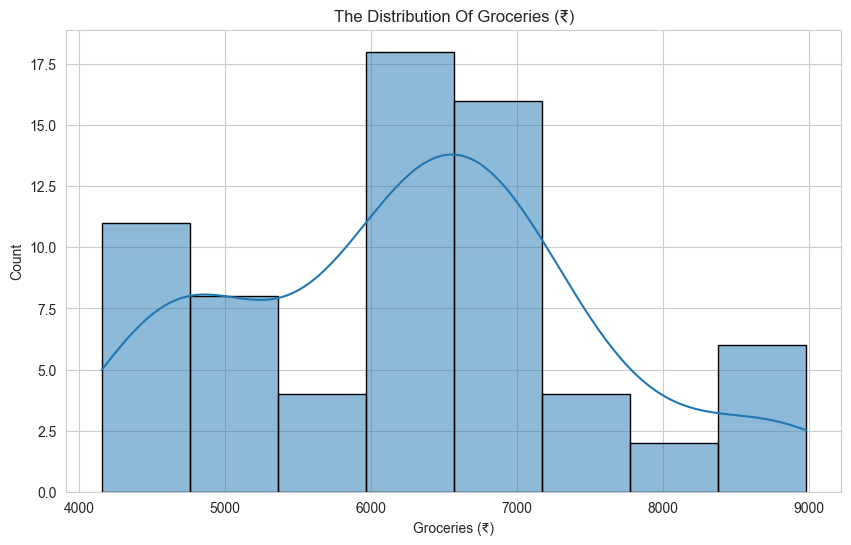

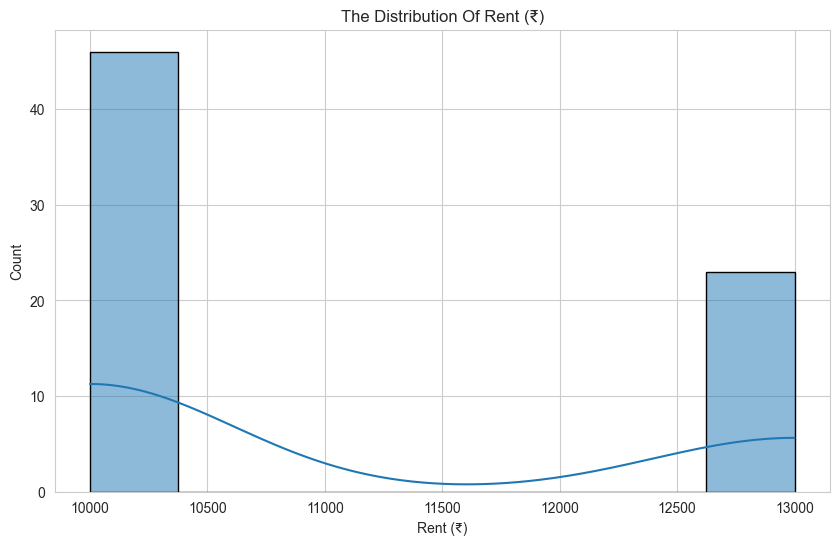

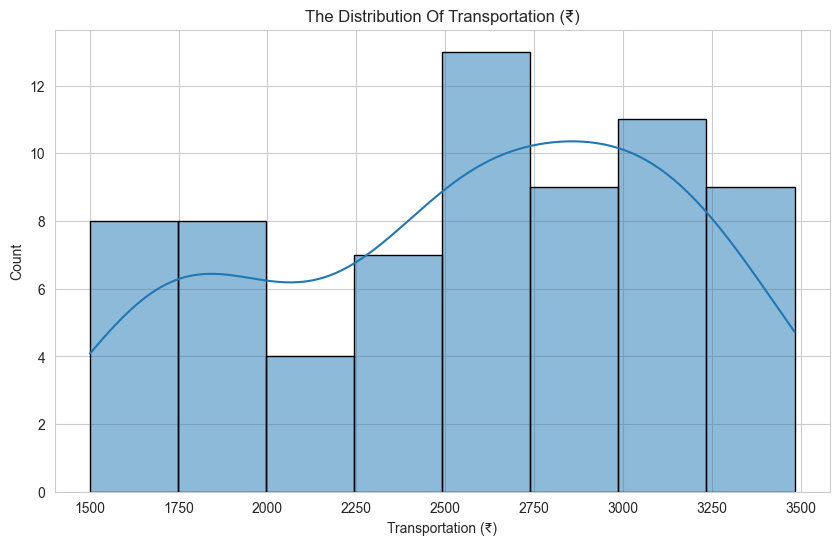

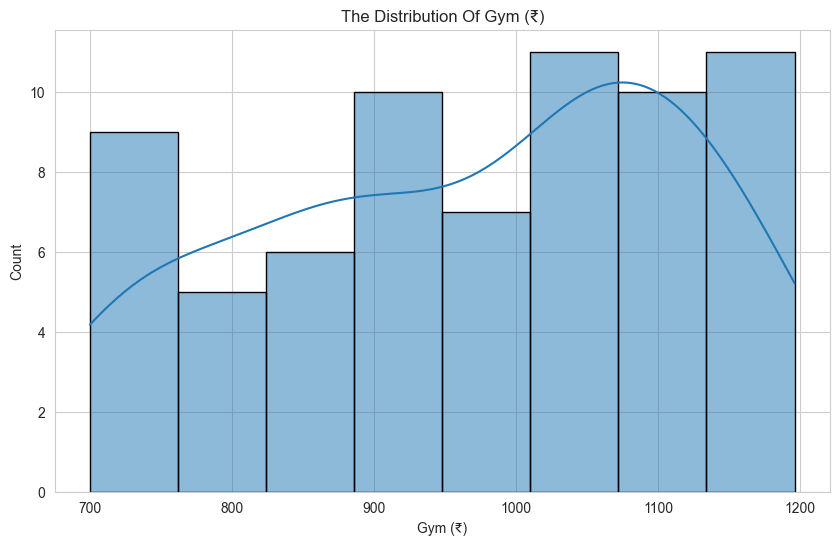

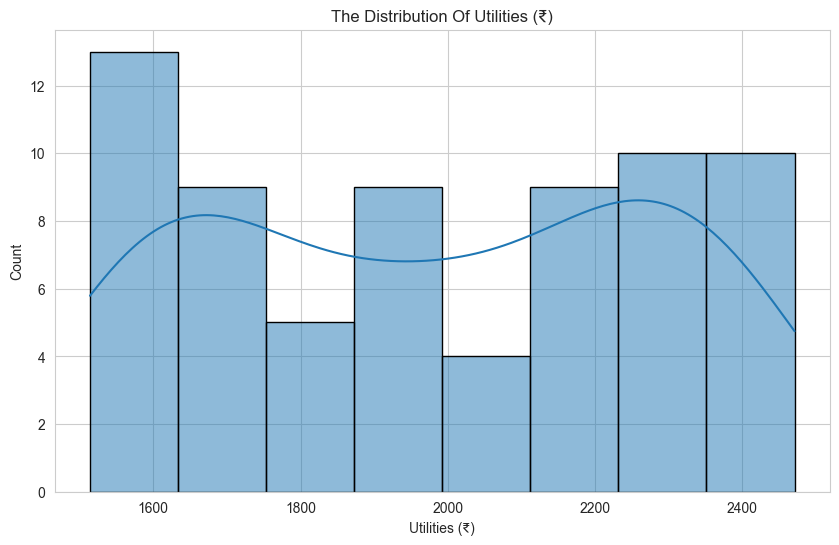

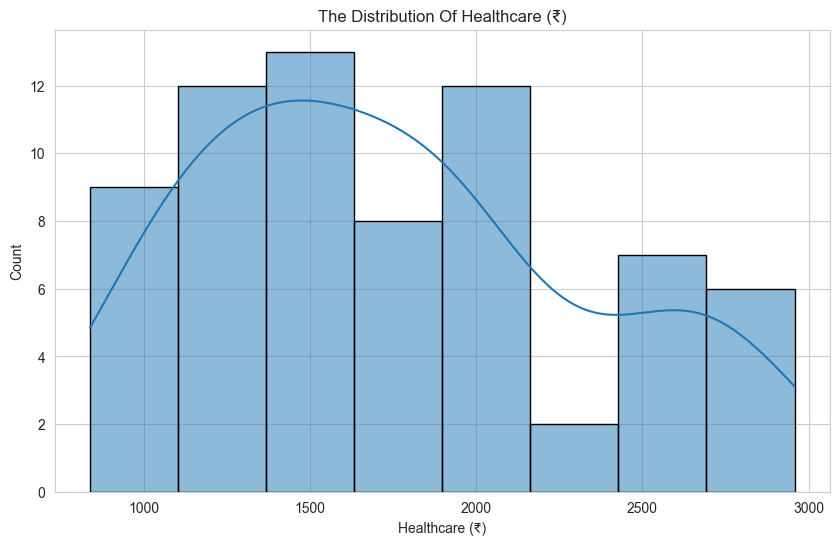

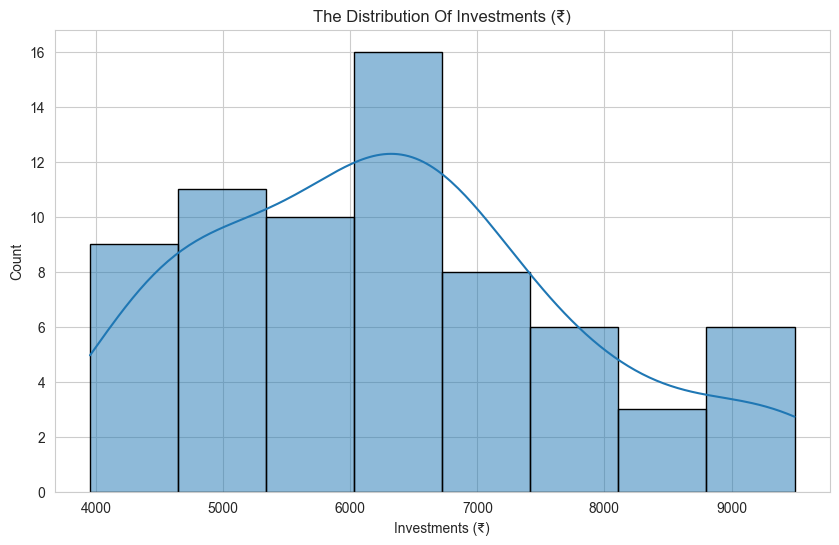

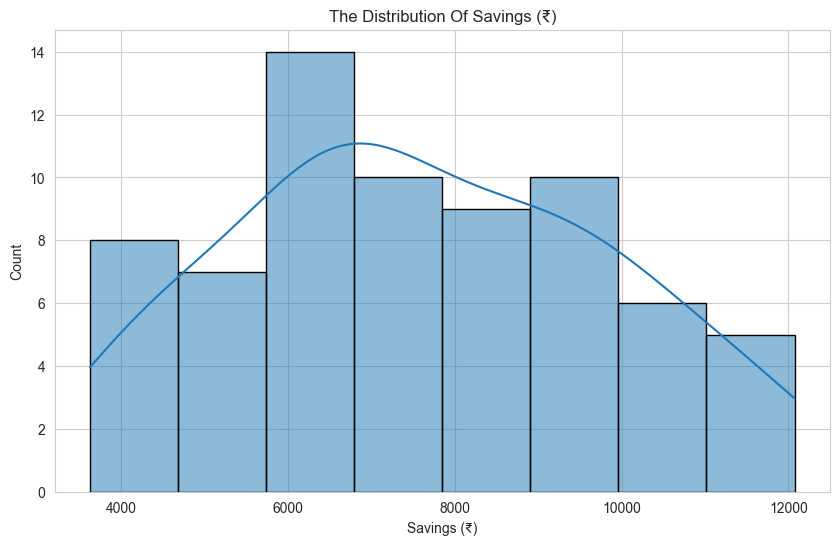

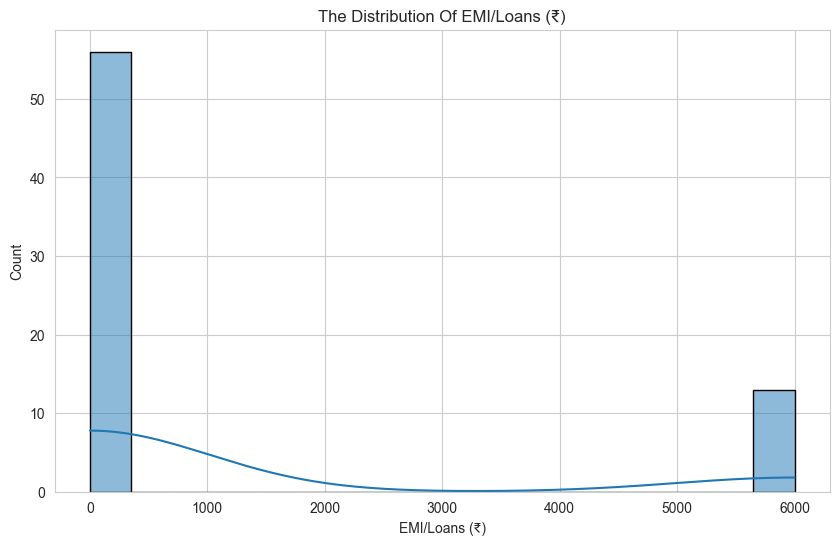

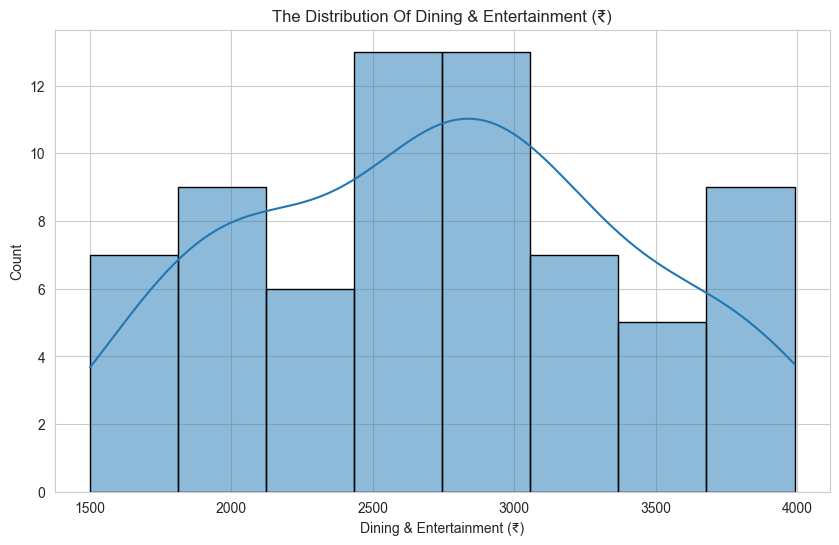

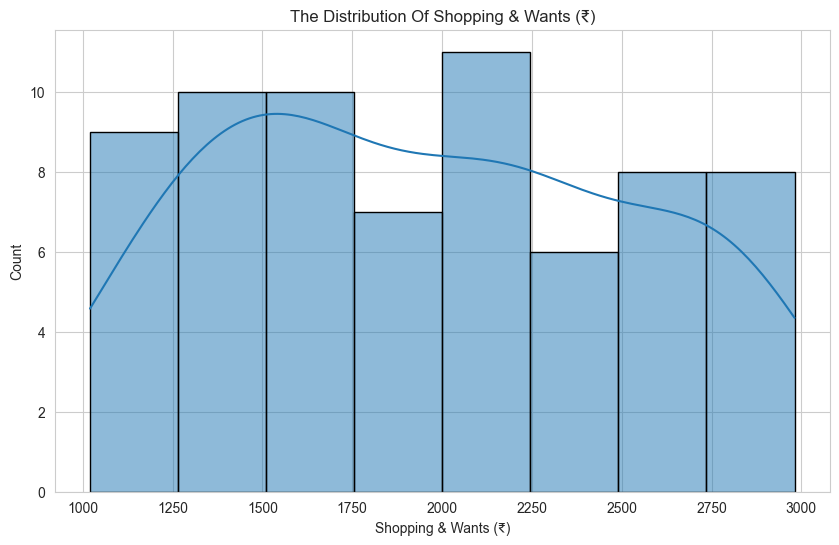

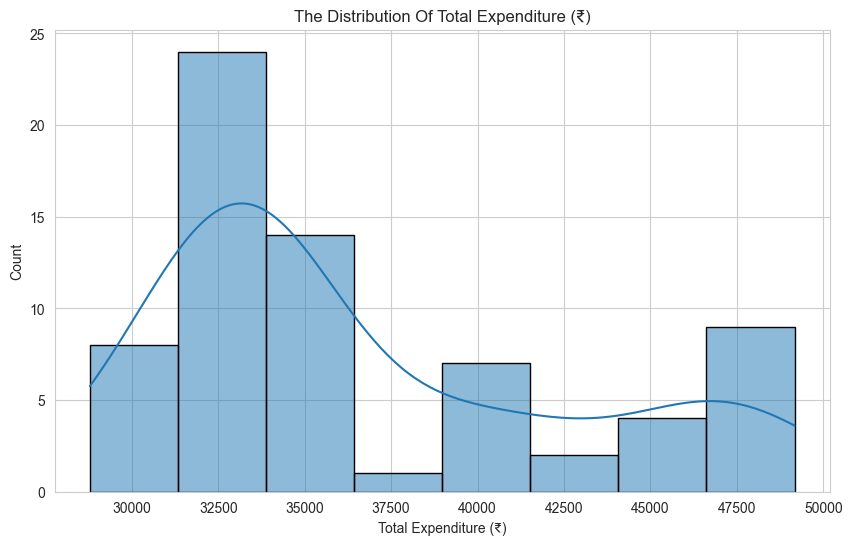

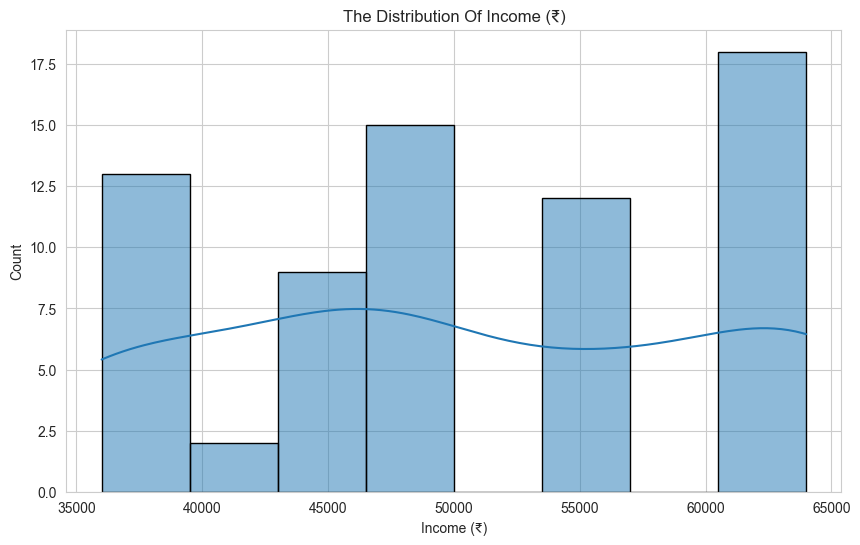

In [100]:
for col in df.columns:
    if col != "Month":
        plt.figure(figsize=(10,6))
        sns.histplot(data=df, x=col, kde=True, edgecolor="black")
        plt.title(f"The Distribution Of {col}")
        plt.show()


In [101]:
df["Month"]=pd.to_datetime(df["Month"])

In [102]:
df["Year"] = df["Month"].dt.year
df["Months"] = df["Month"].dt.month
df.drop(columns="Month", inplace=True)


In [103]:
df.head()

,Groceries (₹),Rent (₹),Transportation (₹),Gym (₹),Utilities (₹),Healthcare (₹),Investments (₹),Savings (₹),EMI/Loans (₹),Dining & Entertainment (₹),Shopping & Wants (₹),Total Expenditure (₹),Income (₹),Year,Months
0,4860,10000,2595,888,1520,1930,4311,4232,0,3138,1121,30363,40000,2020,1
1,6135,10000,2371,851,1630,1923,5939,7329,0,3185,2332,34366,40000,2020,2
2,6853,10000,2715,1143,1776,1185,4700,3625,0,2684,1459,32515,36000,2020,3
3,6904,10000,2582,869,1975,1274,4420,6426,0,2475,2806,33305,36000,2020,4
4,4562,10000,3028,830,1984,1631,4410,3647,0,2146,1020,29611,36000,2020,5


In [104]:
import calendar
df["Month_Name"]=df["Months"].apply(lambda x: calendar.month_name[x])

In [105]:
def vis(colss):
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df,x="Year",y=colss)
    plt.show()

In [106]:
df.columns

Index(['Groceries (₹)', 'Rent (₹)', 'Transportation (₹)', 'Gym (₹)',
       'Utilities (₹)', 'Healthcare (₹)', 'Investments (₹)', 'Savings (₹)',
       'EMI/Loans (₹)', 'Dining & Entertainment (₹)', 'Shopping & Wants (₹)',
       'Total Expenditure (₹)', 'Income (₹)', 'Year', 'Months', 'Month_Name'],
      dtype='object')

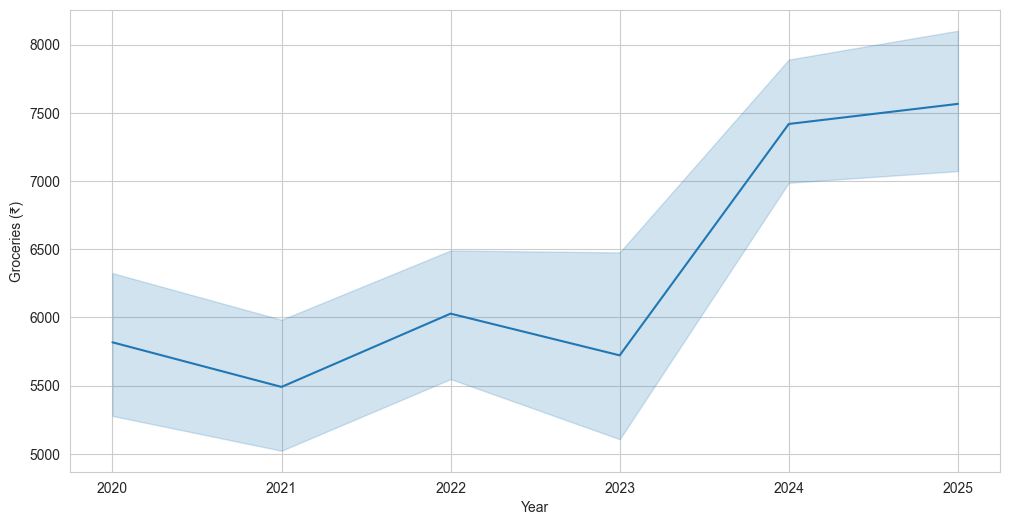

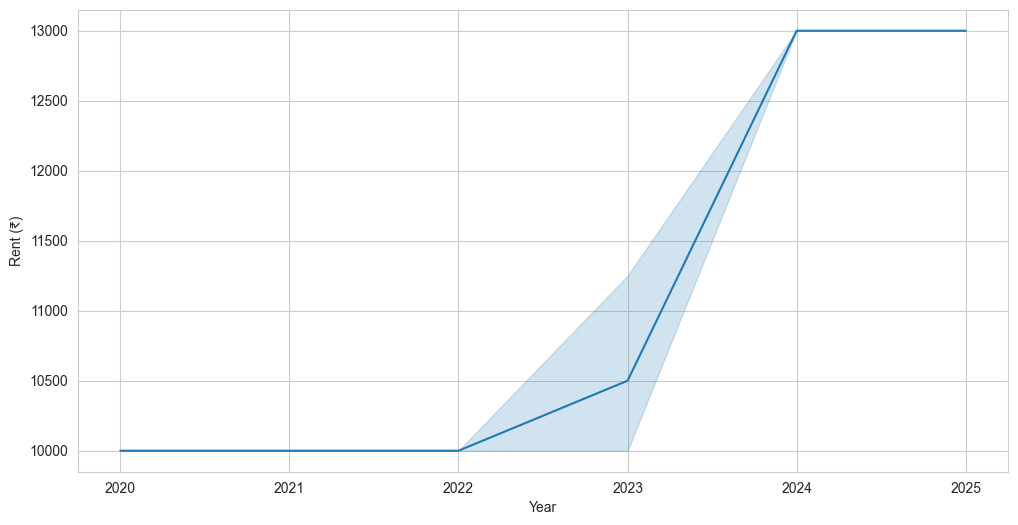

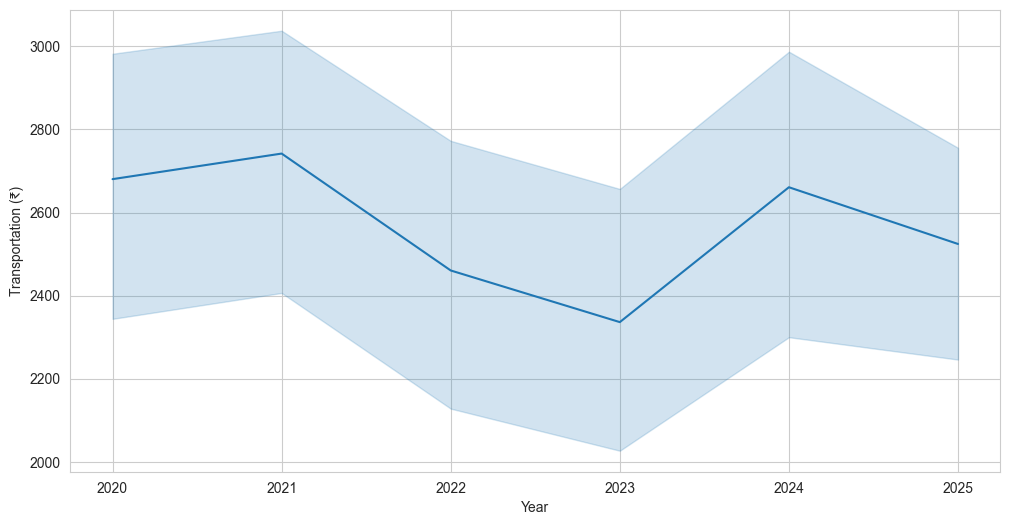

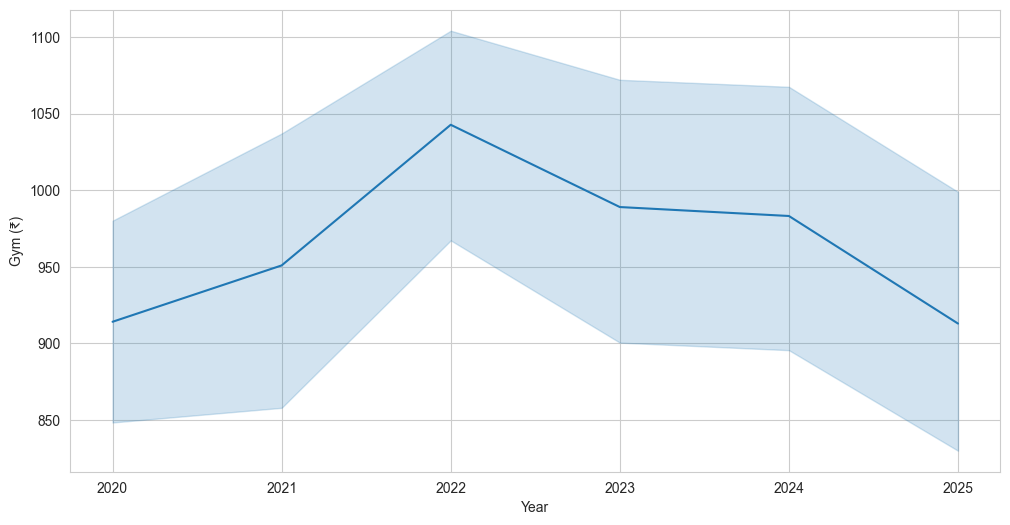

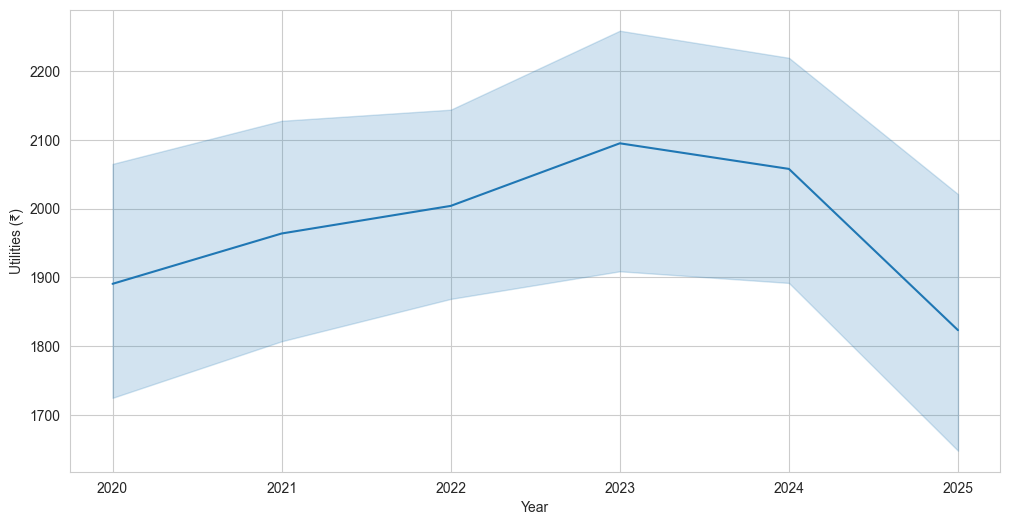

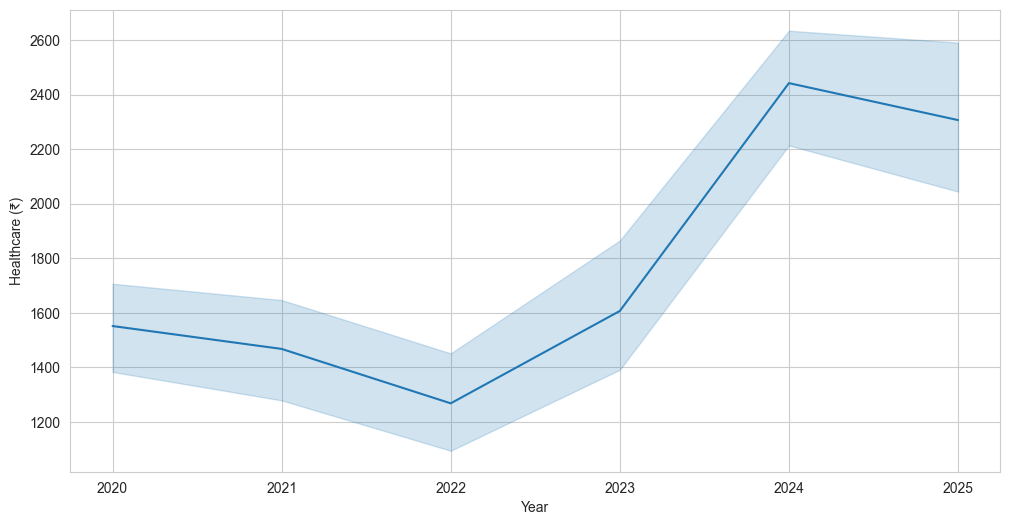

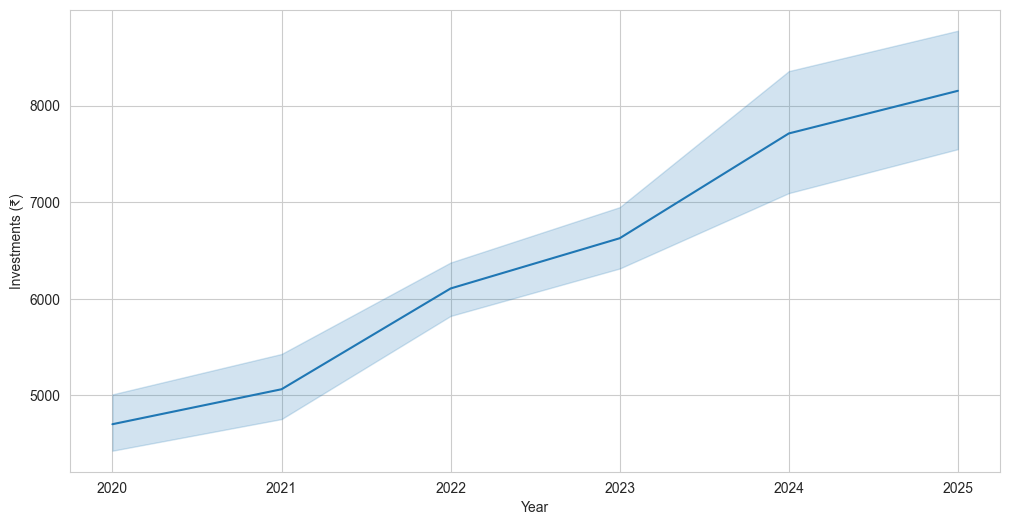

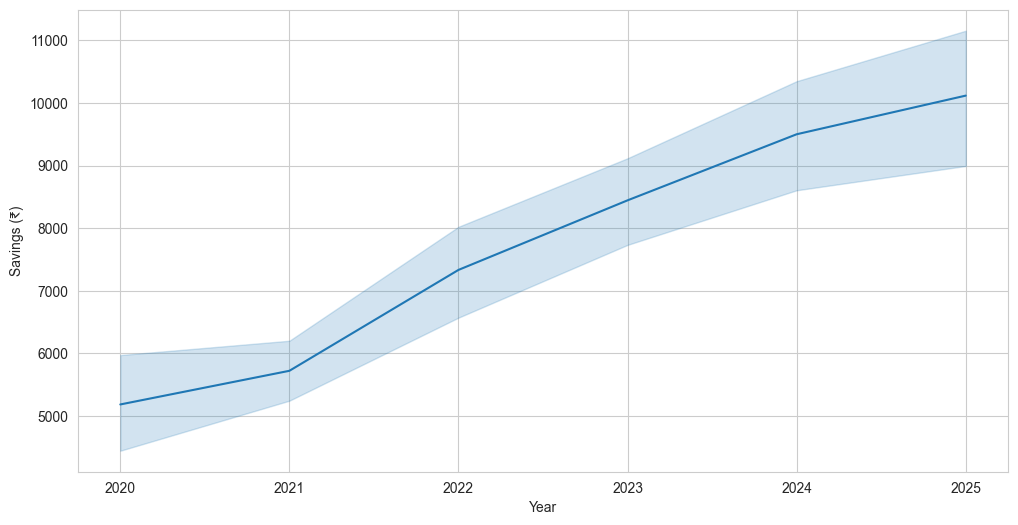

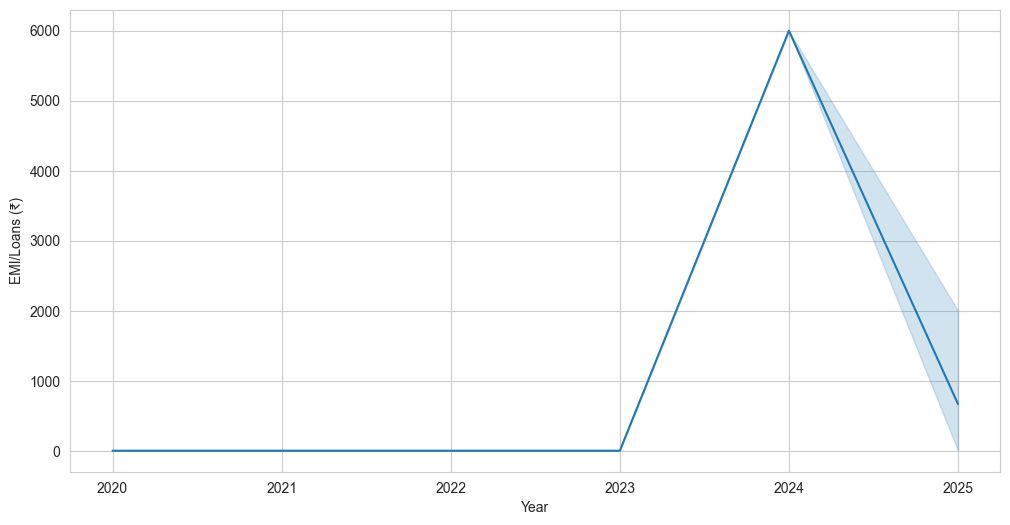

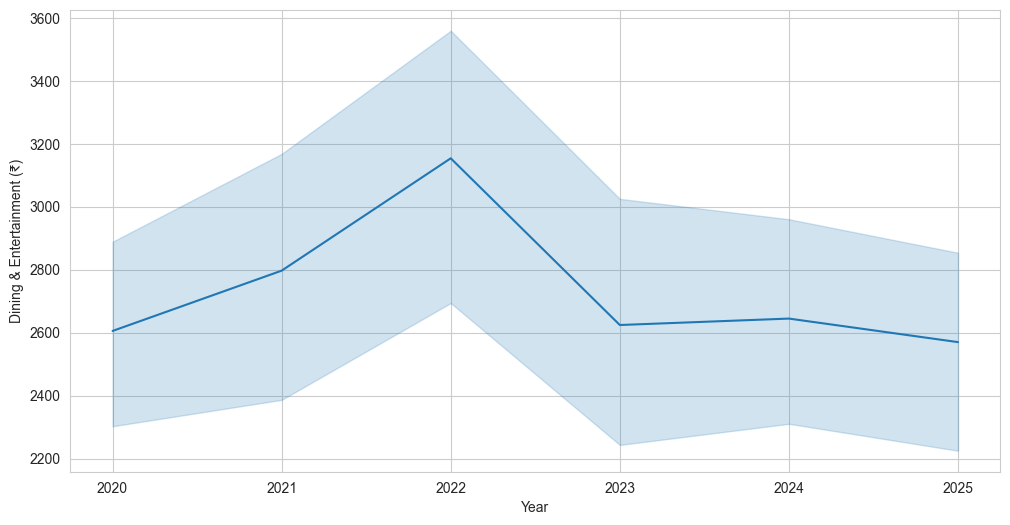

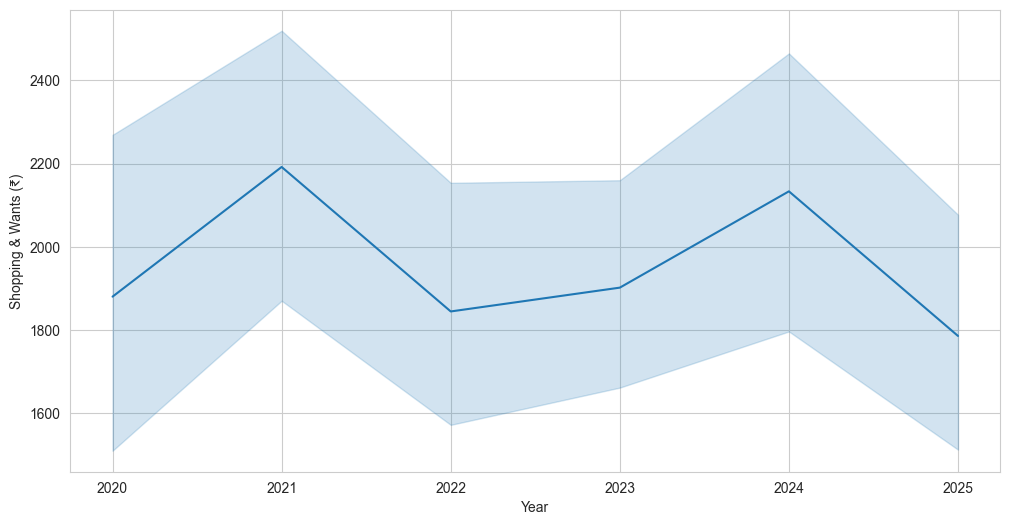

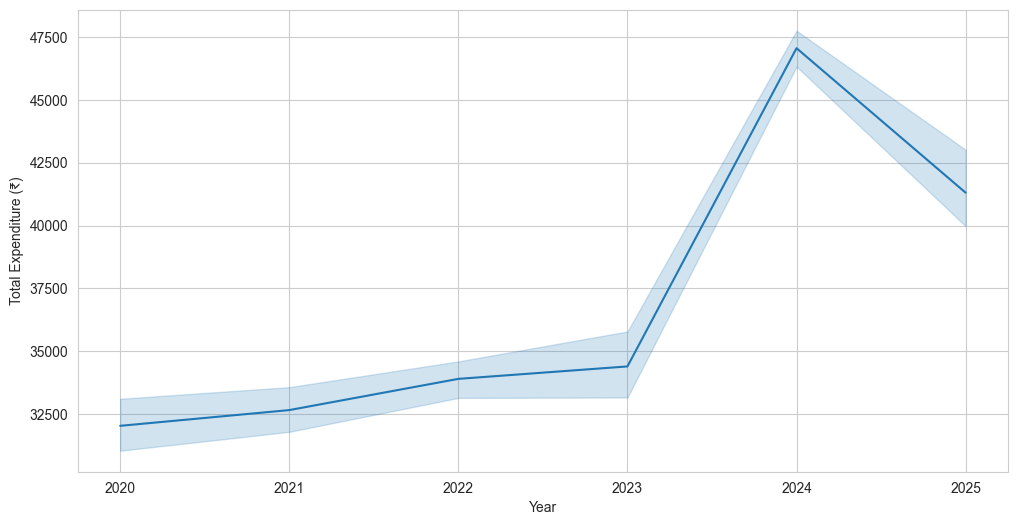

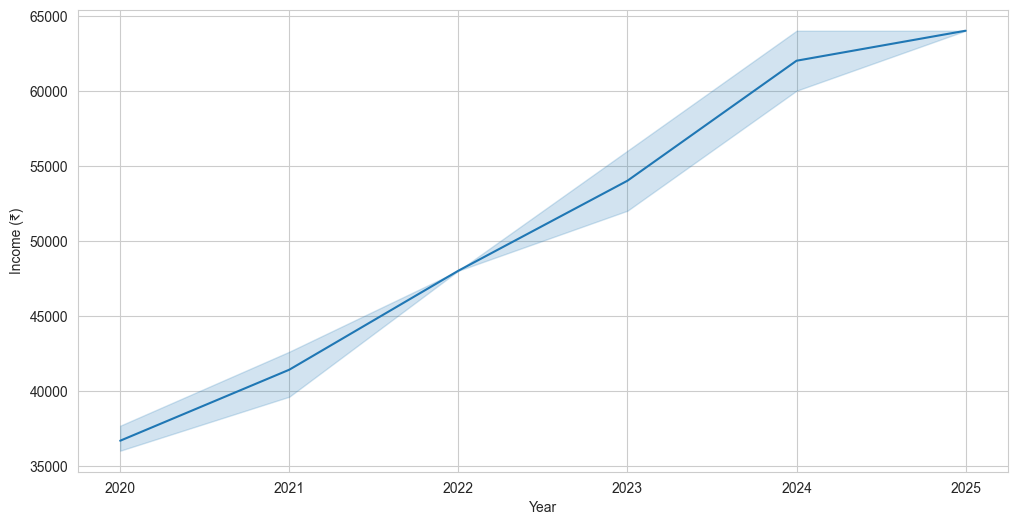

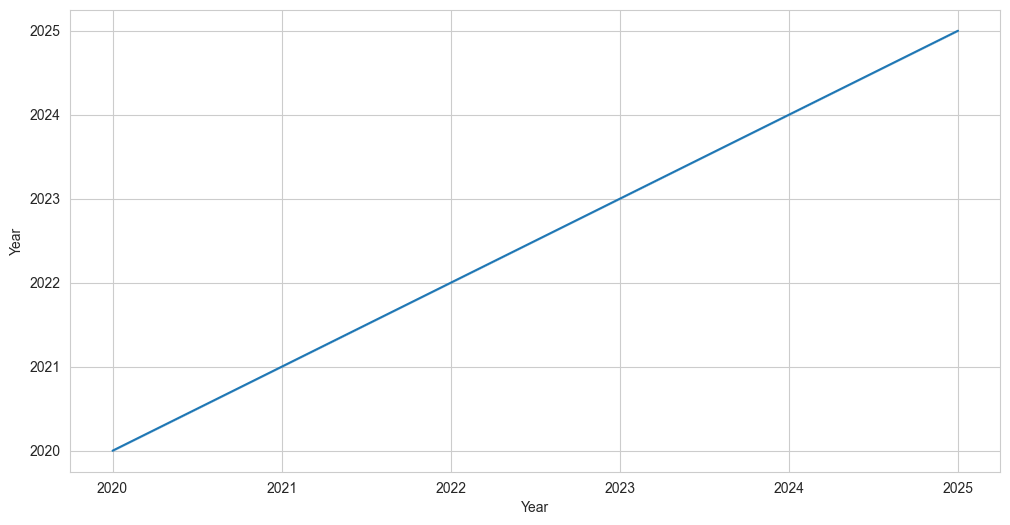

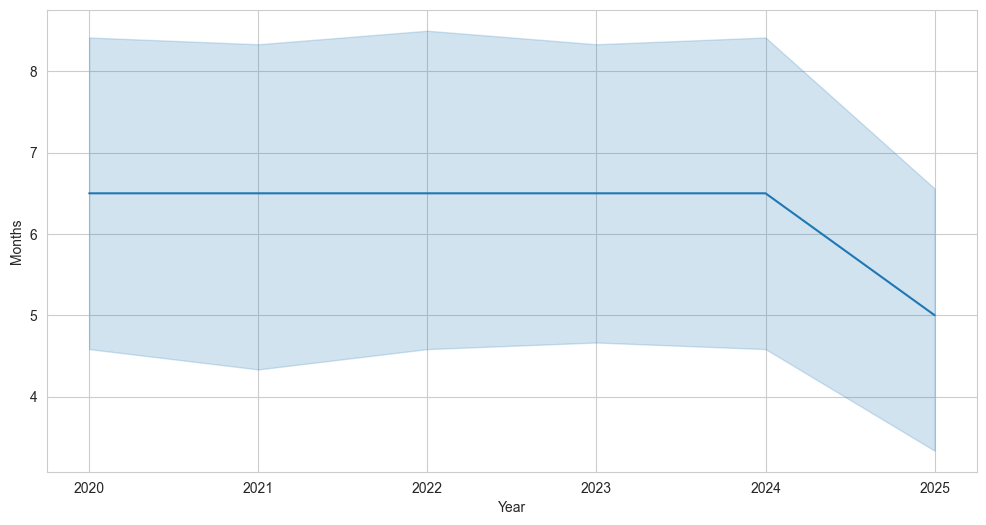

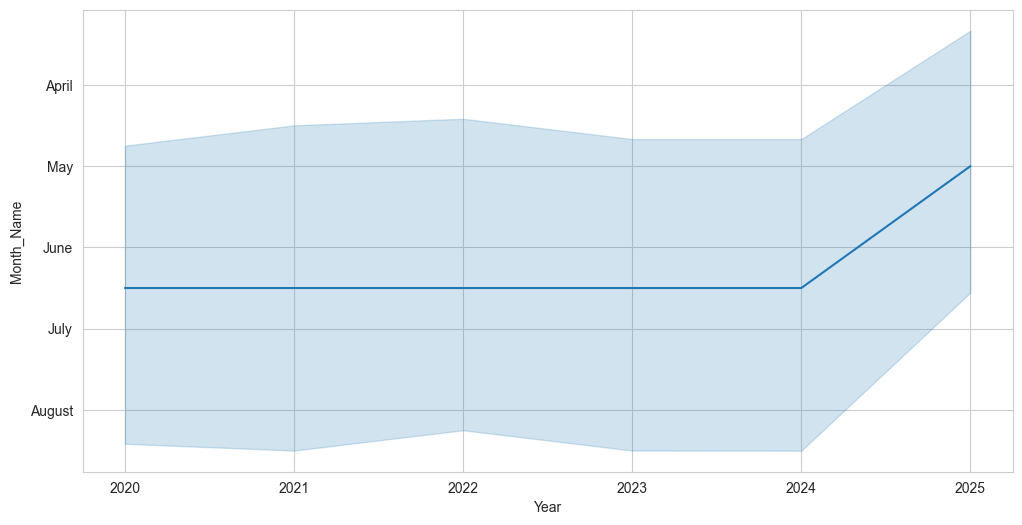

In [107]:
for co in df.columns:
    vis(co)

In [109]:
df.head()

,Groceries (₹),Rent (₹),Transportation (₹),Gym (₹),Utilities (₹),Healthcare (₹),Investments (₹),Savings (₹),EMI/Loans (₹),Dining & Entertainment (₹),Shopping & Wants (₹),Total Expenditure (₹),Income (₹),Year,Months,Month_Name
0,4860,10000,2595,888,1520,1930,4311,4232,0,3138,1121,30363,40000,2020,1,January
1,6135,10000,2371,851,1630,1923,5939,7329,0,3185,2332,34366,40000,2020,2,February
2,6853,10000,2715,1143,1776,1185,4700,3625,0,2684,1459,32515,36000,2020,3,March
3,6904,10000,2582,869,1975,1274,4420,6426,0,2475,2806,33305,36000,2020,4,April
4,4562,10000,3028,830,1984,1631,4410,3647,0,2146,1020,29611,36000,2020,5,May


In [116]:
df.columns


Index(['Groceries (₹)', 'Rent (₹)', 'Transportation (₹)', 'Gym (₹)',
       'Utilities (₹)', 'Healthcare (₹)', 'Investments (₹)', 'Savings (₹)',
       'EMI/Loans (₹)', 'Dining & Entertainment (₹)', 'Shopping & Wants (₹)',
       'Total Expenditure (₹)', 'Income (₹)', 'Year', 'Months', 'Month_Name'],
      dtype='object')

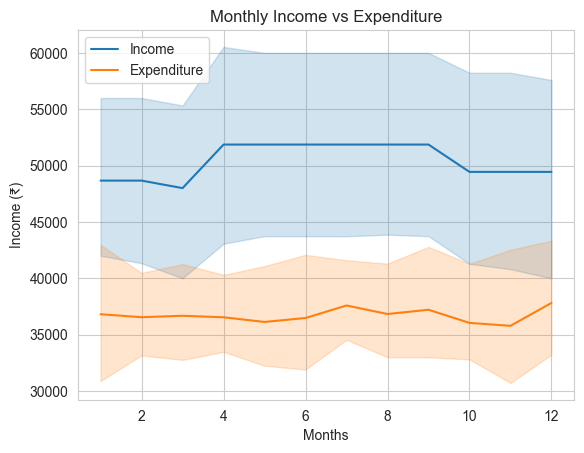

In [118]:
sns.lineplot(data=df, x="Months", y="Income (₹)", label="Income")
sns.lineplot(data=df, x="Months", y="Total Expenditure (₹)", label="Expenditure")
plt.title("Monthly Income vs Expenditure")
plt.legend()
plt.show()


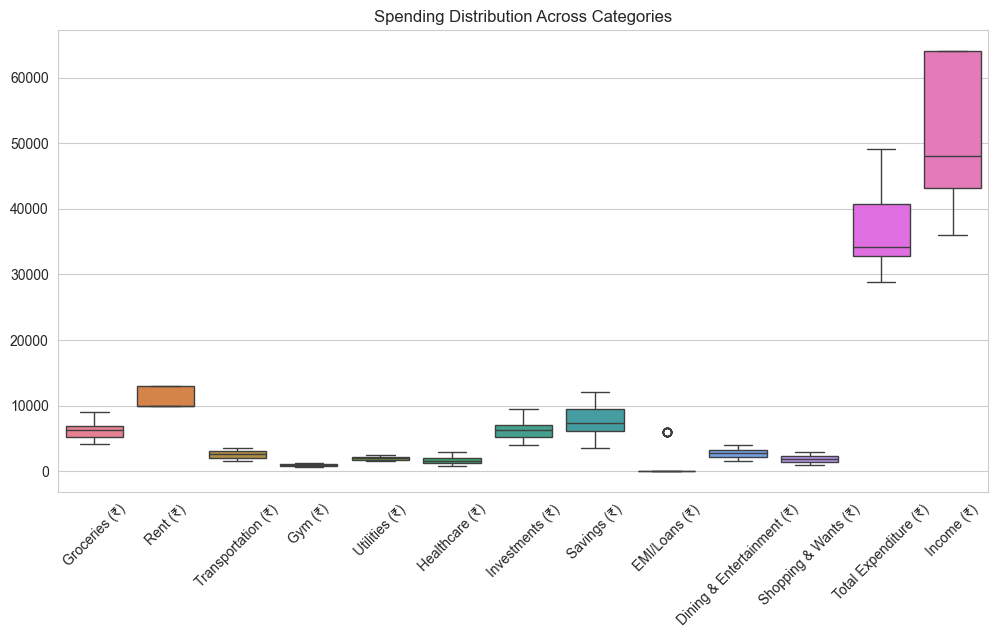

In [119]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[expense_cols])
plt.xticks(rotation=45)
plt.title("Spending Distribution Across Categories")
plt.show()


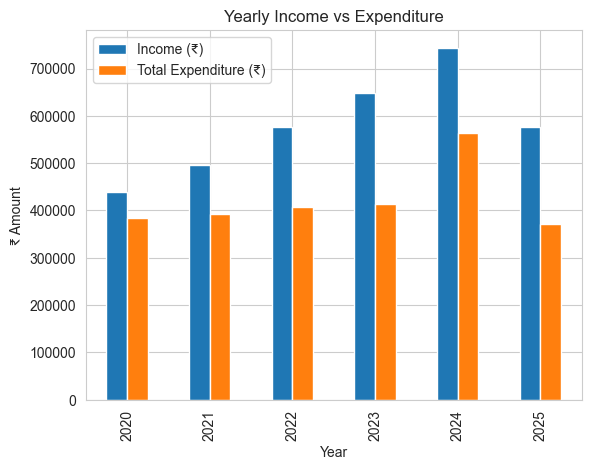

In [120]:
yearly_summary = df.groupby("Year")[["Income (₹)", "Total Expenditure (₹)"]].sum()
yearly_summary.plot(kind="bar", title="Yearly Income vs Expenditure")
plt.ylabel("₹ Amount")
plt.show()


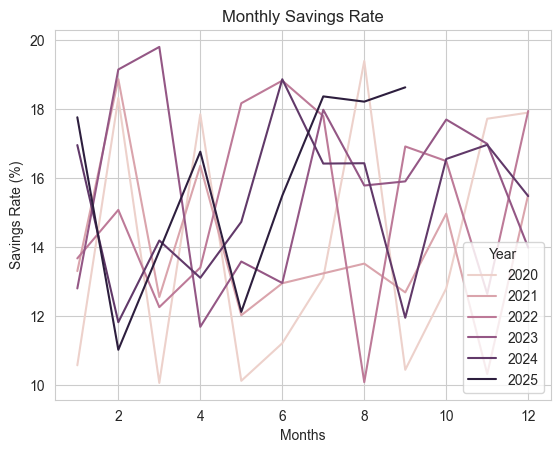

In [121]:
df["Savings Rate (%)"] = (df["Savings (₹)"] / df["Income (₹)"]) * 100
sns.lineplot(data=df, x="Months", y="Savings Rate (%)", hue="Year")
plt.title("Monthly Savings Rate")
plt.show()


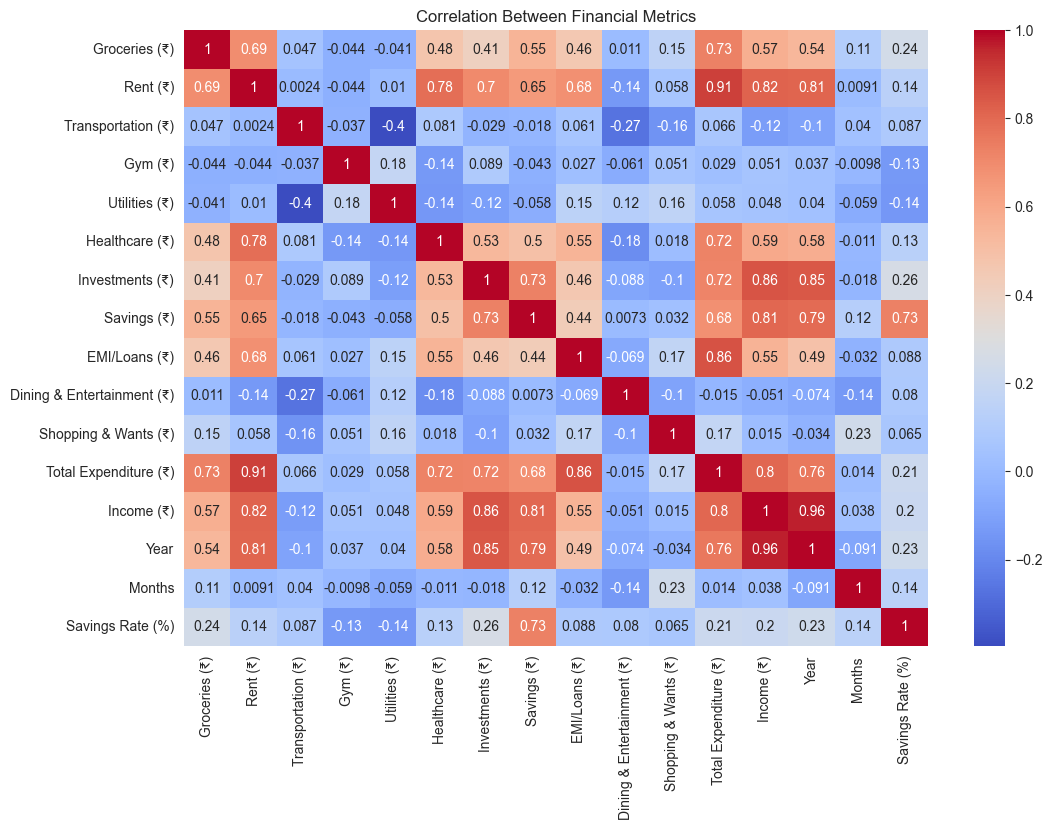

In [122]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Between Financial Metrics")
plt.show()
